In [40]:
import matplotlib.pyplot as plt
%matplotlib inline


# 시조 전처리

In [41]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [42]:
 plt.rc("font", family="Malgun Gothic")

In [43]:
base_dir = 'D:/Data'
excel_file = 'N68.xlsx'
excel_dir = os.path.join(base_dir, excel_file)

In [44]:
df = pd.read_excel(excel_dir, 
                              sheet_name = 'Sheet1', 
                              header = 0, 
                              dtype = {'Text': str, 
                                       'Pattern': str, 
                                       'Value': np.int64, 
                                       'q': np.int64}, 
                              index_col = 'ID', 
                              na_values = 'NaN', 
                              comment = '#')
df.shape

(136, 6)

In [45]:
df

,Text,Pattern,Value,Text(syllable),Text(withB),q
ID,,,,,,
10000011,가노라 가노라 임아 언양 단천의 풍월 강산으로 가노라 임아,초_외_3,1,ㄱㅏㄴㅗㄹㅏ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ ㅇㅓㄴㅇㅑㅇ ㄷㅏㄴㅊㅓㄴㅇㅡㅣ ㅍㅜㅇㅇㅜㅓㄹ ㄱ...,ㄱㅏㄴㅗㄹㅏ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ ㅇㅓㄴㅇㅑㅇ ㄷㅏㄴㅊㅓㄴㅇㅡㅣ ㅍㅜㅇㅇㅜㅓㄹ ㄱ...,1
10019081,어듸야  소 모라 가는 노랑 듸궁이 더벙 머리,초_외_2,1,ㅇㅓㄷㅡㅣㅇㅑ ㅺㅣㄹㅺㅣㄹ ㅅㅗ ㅁㅗㄹㅏ ㄱㅏㄴㅡㄴ ㄴㅗㄹㅏㅇ ㄷㅡㅣㄱㅜㅇㅇㅣ ㄷㅓ...,ㅇㅓㄷㅡㅣㅇㅑ ㅺㅣㄹㅺㅣㄹ ㅅㅗ ㅁㅗㄹㅏ ㄱㅏㄴㅡㄴ ㄴㅗㄹㅏㅇ ㄷㅡㅣㄱㅜㅇㅇㅣ ㄷㅓ...,2
10022821,이년아 말 듯거라 굽고 나마 쟈질년아,초_외_1,1,ㅇㅣㄴㅕㄴㅇㅏ ㅁㅏㄹ ㄷㅡㅅㄱㅓㄹㅏ ㄱㅜㅂㄱㅗ ㄴㅏㅁㅏ ㅈㅑㅈㅣㄹㄴㅕㄴㅇㅏ,ㅇㅣㄴㅕㄴㅇㅏ ㅁㅏㄹ ㄷㅡㅅㄱㅓㄹㅏ ㄱㅜㅂㄱㅗ ㄴㅏㅁㅏ ㅈㅑㅈㅣㄹㄴㅕㄴㅇㅏ,3
10006771,눈아눈아 머르칠 눈아 두 손 장가락으로  질너 머르칠 눈아,초_내_05,1,ㄴㅜㄴㅇㅏㄴㅜㄴㅇㅏ ㅁㅓㄹㅡㅊㅣㄹ ㄴㅜㄴㅇㅏ ㄷㅜ ㅅㅗㄴ ㅈㅏㅇㄱㅏㄹㅏㄱㅇㅡㄹㅗ ㅺ...,ㄴㅜㄴㅇㅏㄴㅜㄴㅇㅏ ㅁㅓㄹㅡㅊㅣㄹ ㄴㅜㄴㅇㅏ ㄷㅜ ㅅㅗㄴ ㅈㅏㅇㄱㅏㄹㅏㄱㅇㅡㄹㅗ ㅺ...,4
10007731,아 은 아 李太白이 노든 아,초_내_05,1,ㄷㆍㄹㅇㅏ ㅂㆍᇃㅇㅡㄴ ㄷㆍㄹㅇㅏ ㅇㅣㅌㅐㅂㅐㄱㅇㅣ ㄴㅗㄷㅡㄴ ㄷㆍㄹㅇㅏ,ㄷㆍㄹㅇㅏ ㅂㆍᇃㅇㅡㄴ ㄷㆍㄹㅇㅏ ㅇㅣㅌㅐㅂㅐㄱㅇㅣ ㄴㅗㄷㅡㄴ ㄷㆍㄹㅇㅏ,5
...,...,...,...,...,...,...
10022011,우정워정며 歲月이 거의로다,NaN,0,ㅇㅜㅈㅓㅇㅇㅜㅓㅈㅓㅇㅎㆍㅁㅕ ㅅㅔㅇㅜㅓㄹㅇㅣ ㄱㅓㅇㅡㅣㄹㅗㄷㅏ,ㅇㅜㅈㅓㅇㅇㅜㅓㅈㅓㅇㅎㆍㅁㅕ ㅅㅔㅇㅜㅓㄹㅇㅣ ㄱㅓㅇㅡㅣㄹㅗㄷㅏ,13
10022361,渭城官 柳樹를 처음의 심근 은,NaN,0,ㅇㅜㅣㅅㅓㅇㄱㅗㅏㄴ ㅇㅠㅅㅜㄹㅡㄹ ㅊㅓㅇㅡㅁㅇㅡㅣ ㅅㅣㅁㄱㅡㄴ ㅼㅡㅇㅡㄴ,ㅇㅜㅣㅅㅓㅇㄱㅗㅏㄴ ㅇㅠㅅㅜㄹㅡㄹ ㅊㅓㅇㅡㅁㅇㅡㅣ ㅅㅣㅁㄱㅡㄴ ㅼㅡㅇㅡㄴ,14
10022711,銀河에 물이 지니 烏鵲橋 단말가,NaN,0,ㅇㅡㄴㅎㅏㅇㅔ ㅁㅜㄹㅇㅣ ㅈㅣㄴㅣ ㅇㅗㅈㅏㄱㄱㅛ ㅼㅡㄷㅏㄴㅁㅏㄹㄱㅏ,ㅇㅡㄴㅎㅏㅇㅔ ㅁㅜㄹㅇㅣ ㅈㅣㄴㅣ ㅇㅗㅈㅏㄱㄱㅛ ㅼㅡㄷㅏㄴㅁㅏㄹㄱㅏ,15


# Train용 데이타

In [46]:
List_from_df_Train_Text_withB = df.iloc[0:102,4].values.tolist()  # 102개의 Syllable(with Blank) Train 텍스트
print(List_from_df_Train_Text_withB)
List_from_df_Train_Value = df.iloc[0:102,2].values.tolist() # 102개의 Train Value
print(List_from_df_Train_Value)

['ㄱㅏㄴㅗㄹㅏ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ ㅇㅓㄴㅇㅑㅇ ㄷㅏㄴㅊㅓㄴㅇㅡㅣ ㅍㅜㅇㅇㅜㅓㄹ ㄱㅏㅇㅅㅏㄴㅇㅡㄹㅗ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ', 'ㅇㅓㄷㅡㅣㅇㅑ ㅺㅣㄹㅺㅣㄹ ㅅㅗ ㅁㅗㄹㅏ ㄱㅏㄴㅡㄴ ㄴㅗㄹㅏㅇ ㄷㅡㅣㄱㅜㅇㅇㅣ ㄷㅓㅂㅓㅇ ㅁㅓㄹㅣ', 'ㅇㅣㄴㅕㄴㅇㅏ ㅁㅏㄹ ㄷㅡㅅㄱㅓㄹㅏ ㄱㅜㅂㄱㅗ ㄴㅏㅁㅏ ㅈㅑㅈㅣㄹㄴㅕㄴㅇㅏ', 'ㄴㅜㄴㅇㅏㄴㅜㄴㅇㅏ ㅁㅓㄹㅡㅊㅣㄹ ㄴㅜㄴㅇㅏ ㄷㅜ ㅅㅗㄴ ㅈㅏㅇㄱㅏㄹㅏㄱㅇㅡㄹㅗ ㅺㅗㄱ ㅈㅣㄹㄴㅓ ㅁㅓㄹㅡㅊㅣㄹ ㄴㅜㄴㅇㅏ', 'ㄷㆍㄹㅇㅏ ㅂㆍᇃㅇㅡㄴ ㄷㆍㄹㅇㅏ ㅇㅣㅌㅐㅂㅐㄱㅇㅣ ㄴㅗㄷㅡㄴ ㄷㆍㄹㅇㅏ', 'ㄷㅏㄹㅇㅏ ㅂㅏㄹㄱㅡㄴ ㄷㅏㄹㅇㅏ ㅇㅣㅁㅇㅡㅣ ㄷㅗㅇㅊㅏㅇ ㅂㅣㅅㅊㅜㅣㄴ ㄷㅏㄹㅇㅏ', 'ㄴㅣㅁ ㄹㅣㅂㅕㄹㅎㆍㅇㅕㅅㄷㅏ ㅎㆍㄱㅗ ㅇㅜㅅㅈㅣ ㅁㅏㄹㅏ ㅎㅐㄷㅏㅇㅎㅗㅏㅇㅑ', 'ㅅㆎㅂㅕㄱ ㅂㅣ ㅇㅣㄹㄱㆎㄴ ㄴㅏㄹㅇㅡㅣ ㅇㅣㄹㄱㅓㅅㅡㄹㅏ ㅇㅏㅎㅡㅣㄷㅡㄹㅇㅏ', 'ㅅㅔㄹㅠ ㅊㅓㅇㅍㅜㅇ ㅂㅣ ㄱㆎㄴ ㅎㅜㅇㅔ ㅇㅜㅈㅣㅁㅏㄹㅏ ㄷㅕ ㅁㆎㅇㅏㅁㅇㅏ', 'ㅇㅣㄴㅗㅇㄱㅗㅏ ㅁㅗㄱㄱㅗㅎㅗㅁㅇㅡㄹ ㅇㅜㅅㅈㅣㅁㅏㅅㅗ ㅂㅓㅅㄴㅣㅁㄴㅔㅇㅑ', 'ㅇㅓㄹㅡㄴㅈㅑ ㄴㅏㅂㅡㅣㅇㅑ ㅇㅔㅇㅓㄹㅡㄴㅈㅑ ㅂㅓㅁㄴㅏㅂㅡㅣㅇㅑ', 'ㅇㅓㄹㅡㄴㅈㅑ ㄴㅓㅊㅜㄹㅣㅇㅑ ㅇㅔㅇㅓㄹㅡㄴㅈㅑ ㅂㅏㄱㄴㅓㅊㅜㄹㅣㅇㅑ', 'ㅇㅓㄹㅣㄹㅅㅑ ㅈㅓ ㅂㅜㅇㅈㅗㅣㅇㅑ ㅇㅜㅅㄴㅗㄹㅏ ㅈㅓ ㅂㅜㅇㅈㅗㅣㅇㅑ', 'ㄱㅗㅅㅗㅇ ㄱㅣㅅㅓㄱ ㄷㅜ ㅅㅏㅇㅣㅇㅖ ㅇㅓㅇㅕㅅㅂㅜㄹㅅㅡㄴ ㅈㅕ ㄷㅜㄱㅕㄴㅇㅏ', 'ㄱㅗㅇㅅㅏㄴㄹㅣ ㅈㅓ ㄱㅏㄴㅏㄴ ㄷㅏㄹㅇㅔ ㅎㅗㄴㅈㅏ ㅇㅜㄴㅏㄴ ㅈㅓ ㄷㅜㄱㅕㄴㅇㅏ', 'ㄱㅗㅇㅅㅏㄴㅇㅣ ㅈㅓㄱㅁㅏㄱㅎㆍㄴㄷㅗㅣ ㅅㅡㄹㅍㅣ ㅇㅜㄴㆍㄴ ㅈㅕ ㄷㅜㄱㅕㄴㅇㅏ', 'ㄱㅗㅇㅅㅏㄴㅍㅜㅇㅇㅜㄴㅇㅑㅇㅔ ㄷㅗㄹㅏㅇㅗㄴㅡㄴ ㅈㅕ ㅅㆍㄹㆍㅁㅇㅏ', 'ㄱㅛㄹㅛㅇㅅㅏㄴ ㅅㅏㅇㅅㅏㅇㅂㅗㅇㅇㅔ ㄱㅣㅅㄷㅡㄹㅕ ㅇㅣㄴㄴㆍㄴ ㅈㅕ ㅂㅐㄱㅇㅜㄴㅇㅏ', 'ㄴㅏㅁㅍㅗㅇㅜㅓㄹ ㄱㅣㅂㅎㅡㄴ ㅂㅏㅁㅇㅔ ㄷㅗㅅㄷㆎ ㅊㅣㄴㅡㄴ ㅈㅓ ㅅㅏㄱㅗㅇㅇㅏ', 'ㄹㅗㄱㅇㅡㅁㅂㅏㅇㅊㅗ ㅅㅔㅇㅜ ㅈㅜㅇㅇㅔ ㅅㅛ ㅁㅓㄱㅇㅣㄴㆍㄴ ㅈㅕ ㅇㅏㅎㅐㅇㅑ', 'ㄴㅗㄱㅇㅡㅁ ㅂㅏㅇㅊ

# test용 데이타


In [47]:
List_from_df_Test_Text_withB = df.iloc[102:,4].values.tolist()  # 34개의 Test 텍스트
print(List_from_df_Test_Text_withB)
List_from_df_Test_Value = df.iloc[102:,2].values.tolist() # 34개의 Test Value
print(List_from_df_Test_Value)

['ㅁㅏㄴㄱㅕㅇㅊㅏㅇㅍㅏ ㅈㅣㅅㅠㅇㅔ ㄷㅜㅇㄷㅜㅇ ㅼㅓㄴㄴㆍㄴ ㄱㅣㄹㅓㄱㅣㅇㅑ', 'ㅂㅐㄱㅅㅏㅈㅓㅇ ㅎㅗㅇㄹㅛㅂㅕㄴㅇㅔ ㄱㅗㄱㅣ ㅇㅕㅅㄴㆍㄴ ㅂㅐㄱㄹㅗㄷㅡㄹㅇㅏ', 'ㅂㅜㄱㅎㅐㅅㅏㅇ ㅍㅕㄴㅈㅣㅈㅓㄴㅌㅡㄴ ㅅㅗㅈㅜㅇㄹㅏㅇㅇㅔ ㄱㅣㄹㅓㄱㅣㅇㅑ', 'ㅅㅏㅂㅕㄱㄷㅏㄹ ㅅㅕㄹㅣㅊㅣㄱㅗ ㅈㅣㅅㆎㄴㅡㄴ ㅂㅏㅁㅇㅔ ㅾㅏㄱㄹㅡㄹ ㄴㅣㄹㅋㅗ ㅇㅜㄹㄱㅗ ㄱㅏㄴㅡㄴ ㄱㅣㄹㅓㄱㅣㅇㅑ', 'ㅅㅓㄱㅇㅑㅇㅊㅓㄴ ㄴㅜㄴㄱㅏㄴ ㅎㅜㅇㅔ ㄴㅗㅂㅎㅣ ㄷㅗㄴㅡㄴ ㅅㅗㄹㅇㅗㄱㆎㅇㅑ', 'ㅅㅗㅇㅜㅓㄴ ㅂㅐㄱㅊㅗㅊㅗㅇㅇㅔ ㄴㆍㄴㅣㄴㆍㄴ ㄴㅏㅂㅡㅣㄷㅡㄹㅇㅏ', 'ㅅㅗㄹㅇㅏㄹㆎㅇㅔ ㄱㅜㅂㅜㄴ ㄱㅣㄹㄴㅗ ㅅㅔㅅ ㄱㅏㄴㆍㄴㄷㅡㅣ ㅁㆎㄴㅁㅏㄹㅈㆎ ㄷㅠㅇㅇㅏ', 'ㅇㅏㅂ ㄴㆎㄴㅏ ㄷㅜㅣ ㄴㆎㄴㅏ ㅈㅜㅇㅇㅔ ㅅㅗ ㅁㅓㄱㄱㅣㄴㆍㄴ ㅇㅏㅎㅡㅣㄴㅗㅁㄷㅡㄹㄹㅏ', 'ㅇㅏㅂ ㄴㆎㄴㅏ ㄷㅜㅣ ㄴㆎㄴㅏ ㅈㅜㅇㅇㅔ ㅅㅗ ㅁㅓㄱㄱㅣㄴㆍㄴ ㅇㅏㅎㅡㅣㄴㅗㅁㄷㅡㄹㄹㅏ', 'ㅇㅗㄱㄹㅜ ㅅㅏㅊㅏㅇ ㅎㅗㅏㄹㅠㅈㅜㅇㅇㅡㅣ ㅂㅐㄱㅁㅏ ㄱㅡㅁㅍㅕㄴ ㅅㅗㄴㅕㄴㄷㅡㄹㅇㅏ', 'ㅇㅗㄱㅎㅏㄱㅗㅏㄴ ㅈㅕㅁㅇㅡㄴ ㄴㅏㄹㅇㅔ ㅇㅔㅇㅕㅅㅂㅜㄹㅅㅗㄴ ㅅㅏㅁㅎㅏㄱㅅㅏㅇㅕ', 'ㅈㅕ ㄱㅓㄴㄴㅓ ㄴㅏㅂㅜㅅㅏㄴ ㄴㅜㄴ ㅅㅗㄱㅇㅔ ㄱㅓㅁㅇㅓ ㅇㅜㅅㅼㅜ ㅇㅜㄹㅌㅗㅇㅂㅜㄹㅌㅗㅇ ㄱㅗㅏㅇㄷㆎㄷㅡㅇㄱㅓㄹㅇㅏ', 'ㅈㅗㅇㄴㅏㅁㅅㅏㄴ ㄴㅜㅇㅔㅁㅓㄹㅣ ㄱㅡㅅㅎㅔ ㅂㅏㅁㅈㅜㅇㅁㅏㅊㅣ ㅎㅠㅇㅎㅣ ㅇㅜㄴㆍㄴ ㅂㅜㅎㅓㅇㅇㅏ', 'ㅈㅜㄹㅕㅁㅇㅔ ㅂㅣㅊㅗㅣㄴ ㄷㆍㄹㄱㅗㅏ ㅁㅓㄹㄹㅣ ㅇㅗㄴㆍㄴ ㅈㅓㄱㅅㅗㄹㆎㅇㅑ', 'ㅎㅏㄴㅅㅓㅇㄴㅏㄱㅇㅣㄹ ㅊㅏㄴㅂㅏㄹㅏㅁㅇㅔ ㅇㅜㄹㄱㅗ ㄱㅏㄴㅡㄴ ㄱㅣㄹㅓㄱㅣㅇㅑ', 'ㅎㆎ ㄷㅏ ㅈㅕ ㅈㅕㅁㅜㄴ ㄴㅏㄹㅇㅔ ㅈㅣㅈㅕㄱㅜㅣㄴㆍㄴ ㅊㅏㅁㅅㆎㄷㅡㄹㅇㅏ', 'ㅊㅗㄷㅏㅇㅂㅣㄴㄱㅐㄱ ㅁㅏㄴㅈㅗㅏㅈㅜㅇㅇㅔ ㅌㅏㄴㄱㅡㅁㅎㆍㄴㆍㄴ ㅇㅗㅏㅇㅅㅏㅇㅈㅓㅁㅇㅏ', 'ㅅㅣㅈㅓㄹㅇㅣ ㅈㅓㄹㅓㅎㆍㄴㅣ ㅇㅣㄴㅅㅏㄷㅗ ㅇㅣㄹㅓㅎㆍㄷㅏ', 'ㅅㅣㅂㅈㅐㅇㅡㄹ ㄱㅕㅇㅇㅕㅇㅇㅗㄱㅅㅏㄱㅇㅕㄴㅎㆍㄴㅣ ㄱㅡㅁㄱㅏㅇㅈㅣㅅㅏㅇㅇㅣㅇㅗ ㅇㅜㅓㄹㅂㅗㅇㅈㅓㄴㅇㅣㄹㅏ', 'ㅇㅏㅎㅡㅣㅇㅏ ㄱㅜㄹㅓㄱㅁㅏㅇㅌㆎ ㅇㅓㄷㅓ ㅅㅓ

In [48]:
train_input = List_from_df_Train_Text_withB  #음소(Blank처리) 단위 텍스트 입력
train_label = List_from_df_Train_Value
test_input = List_from_df_Test_Text_withB    #음소(Blank처리) 단위 텍스트 입력
test_label = List_from_df_Test_Value

# Function : to_word_chunk7 어절첫모음/어절말음소/첫음소


In [49]:
# 함수 : New Syllable centered word chunks(1개의 문장으로 만듦) - Train 용
# rule 1 : vowel + Blank("B로 표시") - 하나의 문장으로 만들기 위해 빈칸 더해 줌
# rule 2 : 2-5개 음절 chunk

def to_word_chunk7(text_list): 
    test_list_new = []
    for each_item in text_list:
        each_list = each_item.split() 
        d=[]
        e =""    
        for each_word in each_list:
            if len(each_word)/3 < 1.7:
                e+=each_word[:1]+" "
                e+=each_word[:-2]+" "
                e+=each_word[-2:]+"B "           
                e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
            
            elif len(each_word)/3 >= 1.7 and  len(each_word)/3 < 3:
                e+=each_word[:1]+" "
                e+=each_word[:2]+" "
                e+=each_word[1:3]+" "  #어절 첫 모음
                e+=each_word[-2:]+"B "   
                e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
            elif len(each_word)/3 >=3 and len(each_word)/3 <5:
                e+=each_word[:1]+" "
                e+=each_word[:2]+" "
                e+=each_word[1:3]+" "  #어절 첫 모음
                e+=each_word[2:-4]+" "       
                e+=each_word[-4:-2]+" "
                e+=each_word[-2:]+"B "   
                e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
            elif len(each_word)/3 >=5 and len(each_word)/3 <8:
                e+=each_word[:1]+" "
                e+=each_word[:2]+" "
                e+=each_word[1:3]+" "  #어절 첫 모음
                e+=each_word[2:4]+" " 
                e+=each_word[4:6]+" " 
                e+=each_word[6:-2]+" "
                e+=each_word[-2:]+"B "   
                e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
            elif len(each_word)/3 >=8 and len(each_word)/3 <11:
                e+=each_word[:1]+" "
                e+=each_word[:2]+" "
                e+=each_word[1:3]+" "  #어절 첫 모음
                e+=each_word[2:5]+" " 
                e+=each_word[5:8]+" " 
                e+=each_word[8:12]+" "
                e+=each_word[12:15]+" " 
                e+=each_word[15:19]+" "
                e+=each_word[19:-2]+" "
                e+=each_word[-2:]+"B "   
                e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
            else: 
                
                e+=each_word[:1]+" "
                e+=each_word[:2]+" "
                e+=each_word[1:3]+" "  #어절 첫 모음
                e+=each_word[2:5]+" " 
                e+=each_word[5:8]+" " 
                e+=each_word[8:12]+" "
                e+=each_word[12:15]+" " 
                e+=each_word[15:19]+" "
                e+=each_word[19:22]+" "
                e+=each_word[22:26]+" "
                e+=each_word[26:-2]+" "
                e+=each_word[-2:]+"B "
                e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
        test_list_new.append(e)
    return test_list_new

In [50]:
train_ = to_word_chunk7(train_input)
test_ = to_word_chunk7(test_input)

print(train_)   
print("--------------------------------------------------------------------------------------------------------")   
print(test_)   

['ㄱ ㄱㅏ ㅏㄴ ㄹㅏB ㅏB ㄱ ㄱㅏ ㅏㄴ ㄹㅏB ㅏB ㅇ ㅇㅣㅁ ㅇㅏB ㅏB ㅇ ㅇㅓ ㅓㄴ ㅑㅇB ㅇB ㄷ ㄷㅏ ㅏㄴ ㄴㅊㅓ ㄴㅇ ㅡㅣB ㅣB ㅍ ㅍㅜ ㅜㅇ ㅓㄹB ㄹB ㄱ ㄱㅏ ㅏㅇ ㅇㅅㅏㄴ ㅇㅡ ㄹㅗB ㅗB ㄱ ㄱㅏ ㅏㄴ ㄹㅏB ㅏB ㅇ ㅇㅣㅁ ㅇㅏB ㅏB ', 'ㅇ ㅇㅓ ㅓㄷ ㅇㅑB ㅑB ㅺ ㅺㅣ ㅣㄹ ㅣㄹB ㄹB ㅅ  ㅅㅗB ㅗB ㅁ ㅁㅗ ㄹㅏB ㅏB ㄱ ㄱㅏㄴ ㅡㄴB ㄴB ㄴ ㄴㅗㄹ ㅏㅇB ㅇB ㄷ ㄷㅡ ㅡㅣ ㅇㅣB ㅣB ㄷ ㄷㅓㅂ ㅓㅇB ㅇB ㅁ ㅁㅓ ㄹㅣB ㅣB ', 'ㅇ ㅇㅣ ㅣㄴ ㅇㅏB ㅏB ㅁ ㅁ ㅏㄹB ㄹB ㄷ ㄷㅡ ㅡㅅ ㄹㅏB ㅏB ㄱ ㄱㅜㅂ ㄱㅗB ㅗB ㄴ ㄴㅏ ㅁㅏB ㅏB ㅈ ㅈㅑ ㅑㅈ ㅈㅣㄹㄴ ㅕㄴ ㅇㅏB ㅏB ', 'ㄴ ㄴㅜ ㅜㄴ ㄴㅇㅏㄴ ㅜㄴ ㅇㅏB ㅏB ㅁ ㅁㅓ ㅓㄹ ㅣㄹB ㄹB ㄴ ㄴㅜㄴ ㅇㅏB ㅏB ㄷ  ㄷㅜB ㅜB ㅅ ㅅ ㅗㄴB ㄴB ㅈ ㅈㅏ ㅏㅇ ㅇㄱㅏㄹㅏㄱ ㅇㅡ ㄹㅗB ㅗB ㅺ ㅺ ㅗㄱB ㄱB ㅈ ㅈㅣㄹ ㄴㅓB ㅓB ㅁ ㅁㅓ ㅓㄹ ㅣㄹB ㄹB ㄴ ㄴㅜㄴ ㅇㅏB ㅏB ', 'ㄷ ㄷㆍㄹ ㅇㅏB ㅏB ㅂ ㅂㆍ ㆍᇃ ㅡㄴB ㄴB ㄷ ㄷㆍㄹ ㅇㅏB ㅏB ㅇ ㅇㅣ ㅣㅌ ㅌㅐㅂ ㅐㄱ ㅇㅣB ㅣB ㄴ ㄴㅗㄷ ㅡㄴB ㄴB ㄷ ㄷㆍㄹ ㅇㅏB ㅏB ', 'ㄷ ㄷㅏㄹ ㅇㅏB ㅏB ㅂ ㅂㅏ ㅏㄹ ㅡㄴB ㄴB ㄷ ㄷㅏㄹ ㅇㅏB ㅏB ㅇ ㅇㅣ ㅣㅁ ㅡㅣB ㅣB ㄷ ㄷㅗ ㅗㅇ ㅏㅇB ㅇB ㅂ ㅂㅣ ㅣㅅ ㅣㄴB ㄴB ㄷ ㄷㅏㄹ ㅇㅏB ㅏB ', 'ㄴ ㄴ ㅣㅁB ㅁB ㄹ ㄹㅣ ㅣㅂ ㅂㅕㄹㅎㆍㅇ ㅕㅅ ㄷㅏB ㅏB ㅎ ㅎㆍ ㄱㅗB ㅗB ㅇ ㅇㅜㅅ ㅈㅣB ㅣB ㅁ ㅁㅏ ㄹㅏB ㅏB ㅎ ㅎㅐ ㅐㄷ ㄷㅏㅇㅎ ㅗㅏ ㅇㅑB ㅑB ', 'ㅅ ㅅㆎㅂ ㅕㄱB ㄱB ㅂ  ㅂㅣB ㅣB ㅇ ㅇㅣ ㅣㄹ ㆎㄴB ㄴB ㄴ ㄴㅏ ㅏㄹ ㅡㅣB ㅣB ㅇ ㅇㅣ ㅣㄹ ㄹㄱㅓ ㅅㅡ ㄹㅏB ㅏB ㅇ ㅇㅏ ㅏㅎ ㅎㅡㅣㄷ ㅡㄹ ㅇㅏB ㅏB ', 'ㅅ ㅅㅔ ㄹㅠB ㅠB ㅊ ㅊㅓ ㅓㅇ ㅜㅇB ㅇB ㅂ  ㅂㅣB ㅣB ㄱ ㄱ ㆎㄴB ㄴB ㅎ ㅎㅜ ㅇㅔB ㅔB ㅇ ㅇㅜ ㅜㅈ ㄹㅏB ㅏB ㄷ  ㄷㅕB 

In [51]:
# array df 
df["Data_syl"] = train_  +  test_ 

In [52]:
X_train = train_
X_test = test_
y_train = train_label
y_test = test_label
print(y_train)
print(y_test)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# 텍스트 데이터 벡터화 및 분석 모델에 적용

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer =  TfidfVectorizer(ngram_range=(1,15), min_df=0.03, max_df=300) #  para 중 min_df만 유의미함(0.03일때 0.882353)
vectorizer

all_data = train_  +  test_ 
vectorizer.fit(all_data)
all_train =  vectorizer.transform(all_data)
X_train =all_train[:102]

X_test = all_train[102:]

In [54]:
from sklearn.svm import LinearSVC

In [55]:
svm = LinearSVC(C=0.1)

In [56]:
svm.fit(X_train, y_train)

LinearSVC(C=0.1)

In [57]:
print(svm.predict(X_train))
print(y_train)

[0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [58]:
svm.score(X_train, y_train)

0.9607843137254902

In [59]:
svm.score(X_test, y_test)

0.8529411764705882

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_estimators=50)

In [62]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [63]:
rf.score(X_test, y_test)

0.8235294117647058

In [64]:
from sklearn.datasets import make_moons, make_circles, make_classification
mo = make_moons()
ci = make_circles()
cl = make_classification()

print(mo)
print("----------------------------------------------")
print(ci)
print("----------------------------------------------")
print(cl)


(array([[-8.01413622e-01,  5.98110530e-01],
       [ 1.34536505e+00, -4.38468422e-01],
       [ 1.71834935e+00, -1.95682551e-01],
       [ 1.94905575e+00,  1.84891782e-01],
       [ 2.84527587e-01,  9.58667853e-01],
       [ 7.30832427e-02,  1.24732995e-01],
       [-3.20515776e-02,  9.99486216e-01],
       [ 1.46253829e+00, -3.86599306e-01],
       [-2.84527587e-01,  9.58667853e-01],
       [ 1.80141362e+00, -9.81105305e-02],
       [ 5.09442530e-02,  1.84891782e-01],
       [ 1.61911895e-01, -4.55349012e-02],
       [-9.49055747e-01,  3.15108218e-01],
       [-9.60230259e-02,  9.95379113e-01],
       [ 3.27051370e-02,  2.46345416e-01],
       [-3.45365054e-01,  9.38468422e-01],
       [ 1.09602303e+00, -4.95379113e-01],
       [ 5.37461710e-01, -3.86599306e-01],
       [ 1.00000000e+00,  0.00000000e+00],
       [ 1.40478334e+00, -4.14412623e-01],
       [ 6.54634946e-01, -4.38468422e-01],
       [ 1.87131870e+00,  9.28244800e-03],
       [ 1.90096887e+00,  6.61162609e-02],
       [ 4

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer =  TfidfVectorizer(ngram_range=(1,15), min_df=0.03, max_df=300) #  para 중 min_df만 유의미함(0.03일때 0.882353)
vectorizer

all_data = train_  +  test_   # 음소 상태의 train과 test
all_value = y_train  +  y_test  # 하나의 int 리스트로 합침
    

vectorizer.fit(all_data)
feature_tfidf =  vectorizer.transform(all_data)



In [66]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(feature_tfidf)
X_tsne.shape

(136, 2)

In [67]:
# Data의 공간 좌표값 추출

df1 = pd.DataFrame(X_tsne, columns=['x', 'y'])
df1.shape
df1_ = df1.values
df1_

array([[ 1.6041706 ,  6.7299223 ],
       [ 5.5908036 , -1.765205  ],
       [-0.87270814,  3.9143667 ],
       [-1.8858227 ,  4.999001  ],
       [-1.2888364 ,  3.0843136 ],
       [-1.3089426 ,  2.8420644 ],
       [ 4.4329505 ,  3.2362416 ],
       [-3.165765  ,  2.8363662 ],
       [ 0.58558017,  4.6934867 ],
       [ 2.592617  ,  1.164952  ],
       [ 3.5741668 , -2.7431934 ],
       [ 3.5646784 , -2.7342958 ],
       [ 2.5662858 , -2.4040544 ],
       [-6.9589233 ,  0.8397888 ],
       [-2.0877569 , -5.108241  ],
       [-6.627073  ,  0.20057231],
       [-0.07496747,  0.1325144 ],
       [-4.3539033 , -4.1229396 ],
       [-0.01702014, -4.166543  ],
       [-2.9920132 , -2.0381598 ],
       [-2.953111  , -1.4648795 ],
       [ 5.3987083 , 11.711731  ],
       [ 9.872813  , -3.5817666 ],
       [-7.4609504 , -1.5860243 ],
       [ 5.6865683 , -3.1784227 ],
       [-0.5474177 , -4.2918916 ],
       [ 0.6993494 , -5.8901052 ],
       [ 1.1266916 , -5.6531353 ],
       [10.445961  ,

In [68]:
# 그래프를 그리기 위해서 X 값과 y값을 튜플(array)로 변환함. 
# X : Vectorized 된 Data -> array
# y : Value -> array

import numpy as np

#리스트를 넘파이 배열로 변환
value_arrayedlist = np.array(all_value, dtype=np.int64)
value_arrayedlist
Sizo_data = (df1_ ,value_arrayedlist )
Sizo_data

(array([[ 1.6041706 ,  6.7299223 ],
        [ 5.5908036 , -1.765205  ],
        [-0.87270814,  3.9143667 ],
        [-1.8858227 ,  4.999001  ],
        [-1.2888364 ,  3.0843136 ],
        [-1.3089426 ,  2.8420644 ],
        [ 4.4329505 ,  3.2362416 ],
        [-3.165765  ,  2.8363662 ],
        [ 0.58558017,  4.6934867 ],
        [ 2.592617  ,  1.164952  ],
        [ 3.5741668 , -2.7431934 ],
        [ 3.5646784 , -2.7342958 ],
        [ 2.5662858 , -2.4040544 ],
        [-6.9589233 ,  0.8397888 ],
        [-2.0877569 , -5.108241  ],
        [-6.627073  ,  0.20057231],
        [-0.07496747,  0.1325144 ],
        [-4.3539033 , -4.1229396 ],
        [-0.01702014, -4.166543  ],
        [-2.9920132 , -2.0381598 ],
        [-2.953111  , -1.4648795 ],
        [ 5.3987083 , 11.711731  ],
        [ 9.872813  , -3.5817666 ],
        [-7.4609504 , -1.5860243 ],
        [ 5.6865683 , -3.1784227 ],
        [-0.5474177 , -4.2918916 ],
        [ 0.6993494 , -5.8901052 ],
        [ 1.1266916 , -5.653

In [69]:
import numpy as np


In [70]:
#%load from github

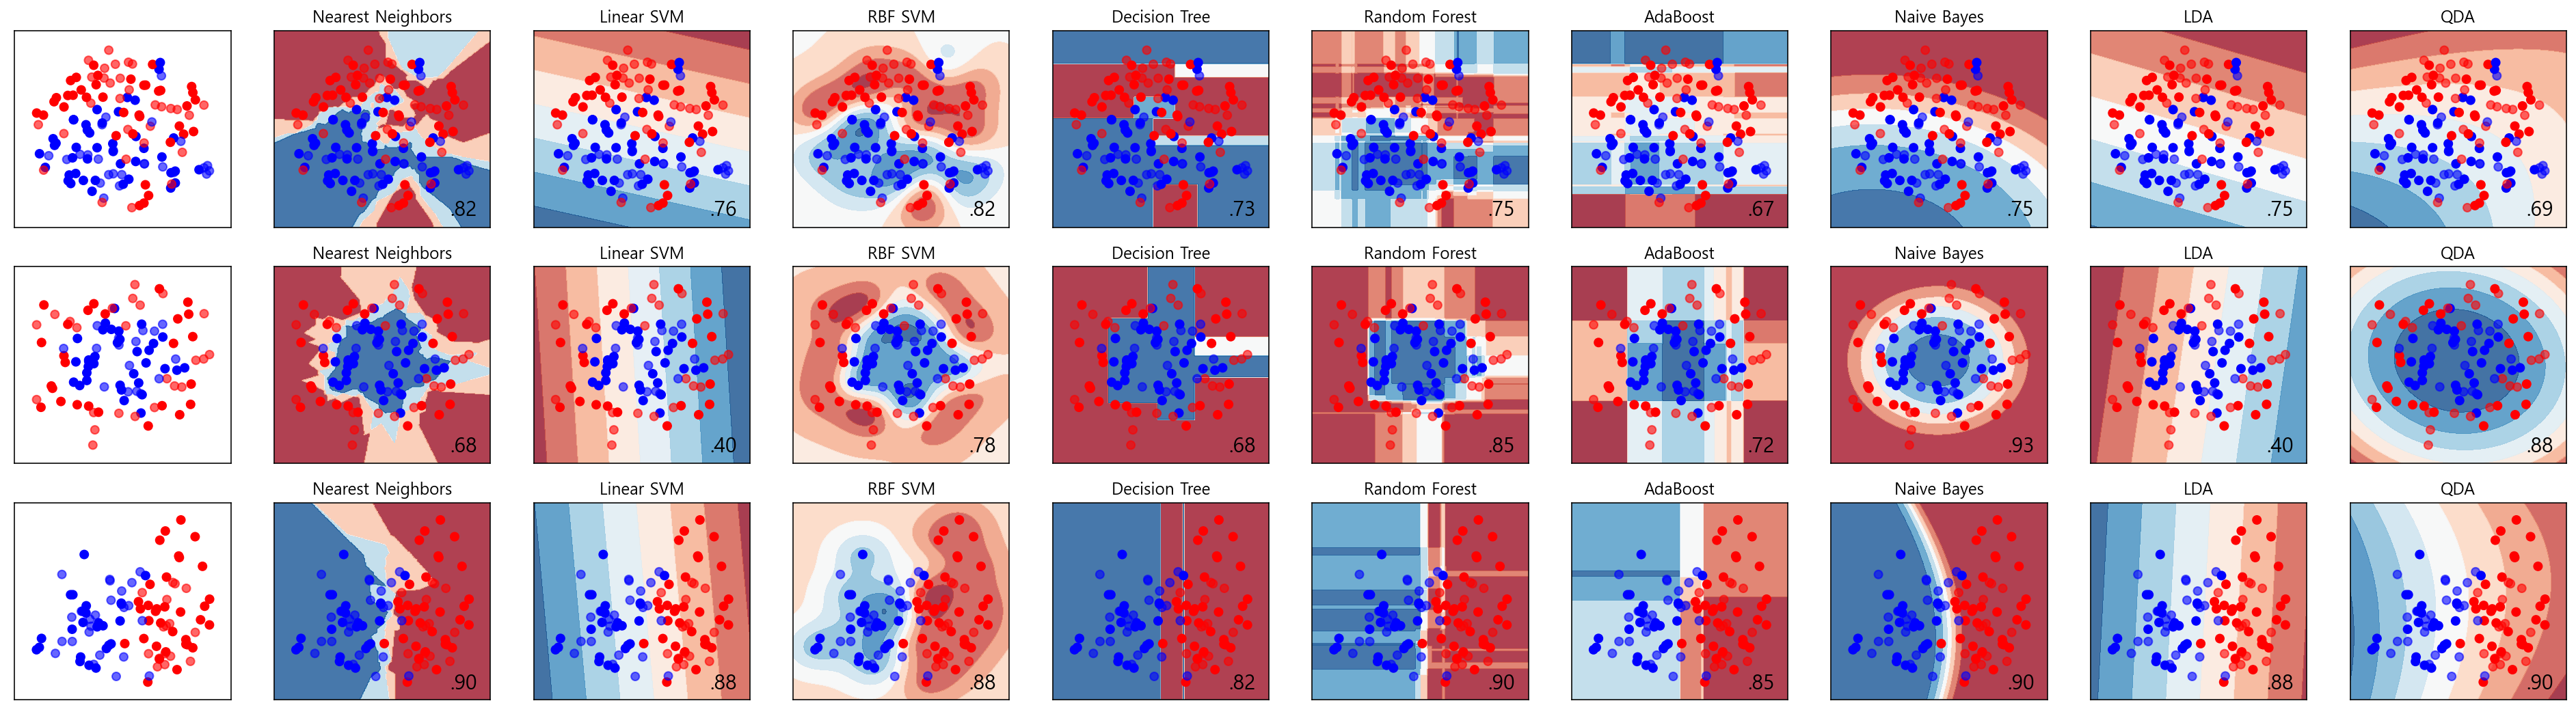

In [71]:
import numpy as np
import pylab as pl
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import  make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from sklearn.qda import QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "LDA", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [Sizo_data,    
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = pl.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = pl.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = pl.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = pl.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
